# 2회차: 확률 기초와 확률분포

## 목차

| 순서 | 파트   | 주제           | 핵심 내용                                        |
|------|--------|----------------|--------------------------------------------------|
| 1    | Part 1 | 핵심 정리      | 확률 vs 통계, 분포 선택 가이드, 기대값/분산 수식 |
| 2    | Part 2 | 확률 기초      | 확률의 정의, 덧셈/곱셈 법칙, 조건부 확률         |
| 3    | Part 3 | 확률변수와 기대값 | 확률변수, PMF/PDF, 기대값 E[X], 분산 Var(X)      |
| 4    | Part 4 | 이산형 분포    | 베르누이, 이항, 포아송 + 실용 예제               |
| 5    | Part 5 | 연속형 분포    | 균등, 지수, 정규 + 실용 예제                     |
| 6    | Part 6 | 정규분포 심화  | 68-95-99.7 법칙, Z-score, 표준정규분포           |
| 7    | Part 7 | 종합 실습      | 분포 선택, 분포 간 관계, 중심극한정리             |

> **실습 과제**는 별도 파일 `practice_02_assignment.ipynb`에 있습니다.


---

## Part 1: 핵심 정리

### 1. 확률 vs 통계

| 구분             | 확률 (Probability)                              | 통계 (Statistics)                        |
|------------------|------------------------------------------------|------------------------------------------|
| **방향**         | 모집단 → 표본 (연역적)                          | 표본 → 모집단 (귀납적)                   |
| **알고 있는 것** | 모집단의 특성 (분포, 확률)                       | 표본 데이터                              |
| **구하는 것**    | "이런 표본이 나올 확률은?"                       | "모집단은 어떨까?"                       |
| **예시**         | "동전을 10번 던지면 앞면이 7번 이상 나올 확률은?" | "10번 던져서 앞면 7번, 이 동전은 공정한가?" |

> **핵심**: 확률은 "이미 알고 있는 규칙으로 미래 예측", 통계는 "데이터로 모르는 규칙 추론"

### 2. 확률변수의 유형

| 유형       | 정의                   | 예시                           | 확률 표현            |
|------------|------------------------|--------------------------------|----------------------|
| **이산형** | 셀 수 있는 값 (정수)   | 주사위 눈, 불량품 개수, 방문자 수 | PMF (확률질량함수)   |
| **연속형** | 셀 수 없는 값 (실수)   | 키, 무게, 시간, 온도           | PDF (확률밀도함수)   |

### 3. 분포 선택 가이드 (언제 어떤 분포를 쓸까?)

#### 이산형 분포

| 분포         | 상황                 | 핵심 질문              | 실용 예제                        |
|--------------|----------------------|------------------------|----------------------------------|
| **베르누이** | 1회 시행, 성공/실패  | "이번에 성공할까?"     | 광고 클릭 여부, 합격/불합격      |
| **이항**     | n회 시행, 성공 횟수  | "n번 중 몇 번 성공?"  | 100개 중 불량품 수, 전환율 테스트 |
| **포아송**   | 단위당 발생 횟수     | "시간/공간당 몇 번?"  | 시간당 통화량, 페이지당 오타 수  |

#### 연속형 분포

| 분포     | 상황               | 핵심 질문                | 실용 예제                          |
|----------|--------------------|--------------------------|------------------------------------|
| **균등** | 모든 값이 동일 확률 | "어디서든 같은 확률?"    | 난수 생성, 룰렛, 랜덤 도착        |
| **지수** | 사건 간 대기 시간  | "다음 사건까지 얼마나?" | 고객 도착 간격, 기계 고장까지 시간 |
| **정규** | 자연현상 대부분    | "평균 주변에 몰려있나?" | 키, 시험 점수, 측정 오차           |

### 4. 기대값과 분산 핵심 수식

| 구분         | 이산형                                           | 연속형                                                    |
|--------------|--------------------------------------------------|-----------------------------------------------------------|
| **기대값**   | $E[X] = \sum_{x} x \cdot P(X=x)$                | $E[X] = \int_{-\infty}^{\infty} x \cdot f(x) dx$         |
| **분산**     | $Var(X) = E[(X-\mu)^2] = E[X^2] - (E[X])^2$    | 동일                                                      |
| **표준편차** | $\sigma = \sqrt{Var(X)}$                         | 동일                                                      |

> **기대값** = "평균적으로 기대하는 값" (확률을 가중치로 한 가중평균)
>
> **분산** = "기대값에서 얼마나 떨어져 있나" (퍼진 정도의 제곱)

![분포 선택 가이드](images/pr_02/분포_선택_가이드.png)

In [2]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import time

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 전역 시드 설정 (재현성을 위해)
np.random.seed(42) #랜덤 시드??? 시드가 무슨 역할을 할까? 난수를 생성할 때 --> 랜덤값 --> 규칙기반으로 생성하는데 --> 그 규칙에 들어가는 숫자
# 시드값 --> 랜덤으로 나오는 값이 결정
# 랜덤 시드를 동일하게 하면 모든 플랫폼에서 동일한 랜덤값을 얻을 수 있다? 없다?
# 결론 --> 동일하게 나올 수도 있고, 없을 수도있음
# 내 환경에서는 동일하게 나옴!!

print("="*60)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("="*60)

라이브러리 로드 완료!
한글 폰트 설정 완료!


---

## Part 2: 확률 기초

### 1. 확률의 정의

| 관점             | 정의                           | 예시                              |
|------------------|--------------------------------|-----------------------------------|
| **고전적 확률**  | 동등하게 가능한 경우의 수 비율 | 주사위 1이 나올 확률 = 1/6        |
| **빈도적 확률**  | 무한 반복 시 상대 빈도의 극한  | 동전을 많이 던지면 앞면 비율 → 0.5 |
| **주관적 확률**  | 개인의 믿음/확신의 정도        | "내일 비 올 확률 70%"             |

### 2. 확률의 기본 성질

1. **비음수성**: $0 \leq P(A) \leq 1$
2. **정규성**: $P(\Omega) = 1$ (전체 표본공간의 확률은 1)

### 3. 확률의 기본 법칙

#### 여사건

$P(A^c) = 1 - P(A)$

> 전체 확률은 1이므로, A가 일어나지 않을 확률은 1에서 A의 확률을 빼면 된다.

#### 덧셈 법칙 (합집합의 확률)

$P(A \cup B) = P(A) + P(B) - P(A \cap B)$

> A가 일어날 확률과 B가 일어날 확률을 더하면, A와 B가 겹치는 부분이 두 번 세어진다. 그래서 겹치는 부분 $P(A \cap B)$를 한 번 빼준다.

#### 곱셈 법칙 (교집합의 확률)

$P(A \cap B) = P(A) \cdot P(B|A) = P(B) \cdot P(A|B)$

> A와 B가 둘 다 일어날 확률은, 먼저 A가 일어날 확률에 A가 일어난 상황에서 B가 일어날 확률을 곱한 것이다.

#### 조건부 확률

$P(A|B) = \frac{P(A \cap B)}{P(B)}$

> B가 이미 일어났다고 가정하면 전체 가능성이 B로 줄어든다. 그 안에서 A도 함께 일어나는 비율이 조건부 확률이다.

#### 독립 사건

두 사건 A, B가 **독립**이면:

$P(A \cap B) = P(A) \cdot P(B)$

$P(A|B) = P(A)$

> B가 일어났는지 여부와 관계없이 A의 확률이 변하지 않는다. 즉, 두 사건이 서로의 확률에 아무 영향을 주지 않는 관계이다.

#### 배반 vs 독립 — 헷갈리기 쉬운 개념 정리

| 구분       | 배반 (Mutually Exclusive)                  | 독립 (Independent)                          |
|------------|--------------------------------------------|---------------------------------------------|
| **의미**   | 두 사건이 **동시에 일어날 수 없다**        | 한 사건이 다른 사건의 **확률에 영향을 주지 않는다** |
| **수식**   | $P(A \cap B) = 0$                          | $P(A \cap B) = P(A) \cdot P(B)$            |
| **예시**   | 동전 1회: "앞면"과 "뒷면"                  | 동전 2회: 첫 번째 결과와 두 번째 결과       |
| **관계**   | A가 일어나면 B는 **절대 불가** → 강한 영향 | A가 일어나도 B는 **확률 변화 없음**         |

> **주의**: 확률이 0이 아닌 두 사건이 배반이면, 오히려 독립이 될 수 없다. A가 일어났다는 것만으로 B가 절대 안 일어나니, 서로 강하게 영향을 주는 관계이기 때문이다.

In [3]:
# 예제 1: 카드 확률 계산
print("\n[예제 1] 52장 카드에서 1장을 뽑을 때")

# 카드 구성: 4개 무늬(스페이드, 하트, 다이아, 클럽) × 13개 숫자(A~K)
total_cards = 52
hearts = 13  # 하트 개수
kings = 4    # 킹 개수
heart_king = 1  # 하트 킹 개수

# (1) 하트가 나올 확률
p_heart = 13/52



# (2) 킹이 나올 확률
p_king = 4/52


# (3) 하트 또는 킹이 나올 확률 (덧셈 법칙)
p_king_or_heart = 17 / 52  # 잘못됨!
p_king_or_heart =  (hearts + kings) - heart_king / 52  #올바른 수식


[예제 1] 52장 카드에서 1장을 뽑을 때


In [4]:
# 예제 2: 조건부 확률
print("\n[예제 3] 조건부 확률")
print("주머니에 빨간 공 3개, 파란 공 2개가 있다.")
print("공을 하나 꺼낸 후 다시 넣지 않고 두 번째 공을 꺼낼 때")

# (1) 첫 번째가 빨간 공일 확률
p_red1 = 3/5

# (2) 두 개 모두 빨간 공일 확률 (곱셈 법칙)
p_both_red = p_red1 * (2/4)
print(p_both_red) #0.3 

# (3) 첫 번째가 빨간 공일 때, 두 번째도 빨간 공일 확률 (조건부 확률) 
p_red2_given_red1 = p_both_red / p_red1 #  1/2 # 0.5
print(p_red2_given_red1)





[예제 3] 조건부 확률
주머니에 빨간 공 3개, 파란 공 2개가 있다.
공을 하나 꺼낸 후 다시 넣지 않고 두 번째 공을 꺼낼 때
0.3
0.5


In [5]:
# 예제 3: 독립 사건 vs 종속 사건
print("\n[예제 4] 독립 vs 종속")


# 동전 2번 던지기 - 독립 사건
print("\n동전 2번 던지기 (독립):")
p_head = 0.5

# 첫 번째 앞면, 두 번째 앞면 확률
p_head_head = p_head * p_head
print(p_head_head)

# 주사위 2개 던지기 - 독립 사건
print("\n주사위 2개 던지기 (독립):")

# 둘 다 6이 나올 확률
p_6_6 = (1/6) * (1/6)
print(p_6_6)


[예제 4] 독립 vs 종속

동전 2번 던지기 (독립):
0.25

주사위 2개 던지기 (독립):
0.027777777777777776


---

## Part 3: 확률변수와 기대값

### 1. 확률변수란?

**확률변수(Random Variable)**: 확률분포에서 나올 수 있는 변수 값

| 유형               | 정의                          | 예시                                      |
|--------------------|-------------------------------|-------------------------------------------|
| **이산 확률변수**  | 가능한 값이 셀 수 있음       | 주사위 눈 (1,2,3,4,5,6), 동전 앞면 횟수  |
| **연속 확률변수**  | 가능한 값이 구간 내 모든 실수 | 키 (170.5cm), 대기 시간 (3.7분)           |

### 2. 확률분포 함수

| 함수         | 이산형: PMF (Probability Mass Function, 확률질량함수) | 연속형: PDF (Probability Density Function, 확률밀도함수) |
|--------------|-------------------------------------------------------|----------------------------------------------------------|
| **정의**     | $P(X = x)$                                           | $f(x)$ (특정 값의 확률은 0!)                             |
| **의미**     | 각 값의 확률                                          | 확률 밀도 (면적이 확률)                                  |
| **합/적분**  | $\sum P(X=x) = 1$                                    | $\int f(x)dx = 1$                                       |
| **확률 계산** | $P(X=x)$ 직접 사용                                   | $P(a \leq X \leq b) = \int_a^b f(x)dx$                 |

<img src="images/pr_02/이산_연속_비교.png" width="70%">


### 3. 누적분포함수 (CDF: Cumulative Distribution Function)

**"x 이하가 될 확률"** — 확률을 누적해서 더한 함수

$F(x) = P(X \leq x)$

| 유형       | 정의                                  | 특징                                 |
|------------|---------------------------------------|--------------------------------------|
| **이산형** | $F(x) = \sum_{k \leq x} P(X=k)$     | 계단 모양 (값이 변할 때만 점프)       |
| **연속형** | $F(x) = \int_{-\infty}^{x} f(t) dt$ | 연속적으로 증가하는 부드러운 곡선     |

#### CDF의 핵심 성질

1. **범위**: $0 \leq F(x) \leq 1$ (확률이므로 항상 0과 1 사이)
2. **단조 증가**: x가 커지면 F(x)도 커지거나 같음 (절대 감소하지 않음)
3. **극한값**: $\lim_{x \to -\infty} F(x) = 0$, $\lim_{x \to \infty} F(x) = 1$

#### CDF를 활용한 확률 계산

| 계산하고 싶은 것   | 공식                | scipy.stats 메서드                     |
|--------------------|---------------------|----------------------------------------|
| $P(X \leq x)$     | $F(x)$             | `dist.cdf(x)`                         |
| $P(X > x)$        | $1 - F(x)$         | `dist.sf(x)`                          |
| $P(a < X \leq b)$ | $F(b) - F(a)$      | `dist.cdf(b) - dist.cdf(a)`           |
| $P(X \geq x)$     | $1 - F(x-1)$ (이산형) | `dist.sf(x-1)` 또는 `1 - dist.cdf(x-1)` |

> **왜 CDF가 중요한가요?** PMF/PDF는 "정확히 이 값"의 확률만 알려주지만, 현실에서는 "몇 개 이하", "몇 점 이상" 같은 **구간 확률**이 더 자주 필요합니다. CDF는 이런 구간 확률을 쉽게 계산하게 해줍니다.
>
> **예시**: 시험 점수가 정규분포를 따를 때 "80점 이상 받을 확률"은 `1 - cdf(80)` 또는 `sf(80)`으로 바로 계산할 수 있습니다.

<img src="images/pr_02/누적분포함수_CDF.png" width="70%">

### 4. 기대값 (Expected Value)

**"평균적으로 기대하는 값"** = 확률을 가중치로 한 가중평균

$E[X] = \sum_{x} x \cdot P(X=x) \quad \text{(이산형)}$

#### 기대값의 성질

- $E[c] = c$ (상수의 기대값은 상수)
- $E[aX + b] = aE[X] + b$ (선형성)
- $E[X + Y] = E[X] + E[Y]$ (합의 기대값)

#### 언제 쓰는가?

어떤 행동을 반복했을 때 **장기적으로 평균 얼마를 얻는지** 판단할 때 사용한다.

> **예시**: 복권 1장 가격이 1,000원이고, 당첨 확률 1%에 당첨금이 10,000원이라면 기대값은 $E[X] = 0.99 \times 0 + 0.01 \times 10{,}000 = 100$원이다. 1장에 1,000원을 내고 평균적으로 100원을 돌려받으므로, 장기적으로 손해라는 판단을 내릴 수 있다.

### 5. 분산 (Variance)

**"평균에서 얼마나 떨어져 있나"** = 편차 제곱의 기대값

$Var(X) = E[(X - \mu)^2] = E[X^2] - (E[X])^2$

#### 분산의 성질

- $Var(c) = 0$ (상수의 분산은 0)
- $Var(aX + b) = a^2 Var(X)$ (상수 b는 분산에 영향 없음)
- **표준편차**: $\sigma = \sqrt{Var(X)}$

#### 언제 쓸까요?

기대값이 같더라도 **결과가 얼마나 들쭉날쭉한지(리스크)** 를 비교할 때 사용한다.

> **예시**: 두 주식 A, B의 기대 수익률이 둘 다 연 5%라고 하자. A는 매년 4~6% 사이에서 움직이고, B는 -20%~+30%로 크게 흔들린다. 분산이 작은 A가 더 안정적이므로, 위험을 줄이고 싶은 투자자는 A를 선택할 수 있다.

<img src="images/pr_02/기대값_분산.png" width="50%">

In [6]:
# CDF 실습: 누적분포함수 활용
print("\n[CDF 실습] 누적분포함수 활용")
print("=" * 50)

# ─────────────────────────────────────────────
# 예제 1: 이산형 CDF (주사위)
# ─────────────────────────────────────────────
print("\n[예제 1] 주사위 CDF")
print("공정한 주사위를 던질 때, 각 눈의 확률은 1/6")

# 주사위 눈 1~6, 각각 확률 1/6
x_dice = np.arange(1, 7)
pmf_dice = np.ones(6) / 6  # [1/6, 1/6, 1/6, 1/6, 1/6, 1/6] # 어떤 함수? 확률질량함수

# CDF 계산: F(x) = P(X ≤ x) = PMF의 누적합
cdf_dice = np.cumsum(pmf_dice)

#각 주사위 눈 별로 1~6까지의 누적 분포 확률 값을 표현
for x, p, c in zip(x_dice, pmf_dice, cdf_dice) :
    print(f"X={x}, PMF={p:.2f}, CDF={c:.2f}")
# X=1, PMF=0.17, CDF=0.17
# X=2, PMF=0.17, CDF=0.33
# X=3, PMF=0.17, CDF=0.50
# X=4, PMF=0.17, CDF=0.67
# X=5, PMF=0.17, CDF=0.83
# X=6, PMF=0.17, CDF=1.00


# ─────────────────────────────────────────────
# 예제 2: 연속형 CDF (정규분포)
# ─────────────────────────────────────────────
print("\n[예제 2] 정규분포 CDF")
print("시험 점수: 평균 70점, 표준편차 10점")

mu, sigma = 70, 10
norm_dist = stats.norm(loc=mu, scale=sigma) # 정규 분포의 확률 밀도 함수

# CDF 활용 예제
score_80 = 80
score_60 = 60
score_90 = 90


print(f'P(X <= 80) = cdf(80) = {norm_dist.cdf(score_80):.2f}') #P(X <= 80) = CDF(80) = 0.84
print(f'P(X > 80) = sf(80) = {norm_dist.sf(score_80):.2f}') #P(X <= 80) = sf(80) = 0.16
print(f'P(X > 80) = (1 -cdf(80)) = {1 - norm_dist.cdf(score_80):.2f}') #P(X <= 80) = 1-CDF(80) = 0.16
print(f'P(60 <= X <= 90) = cdf(90)-cdf(60) = {norm_dist.cdf(score_90) - norm_dist.cdf(score_60):.2f}') #P(60 <= X <= 90) = cdf(90)-cdf(60) = 0.82


# PPF(누적분포함수의 역함수)
# 일반함수 y = f(x)
# 역함수 x = f^(-1)(y)

# 상위 10%의 점수를 알고싶다!
# cdf(x) = 0.9 인경우의 x값을 알고싶다!
# ppf(0.9) = x의 값을 알 수 있다!
print(f"상위 10%의 컷트라인 점수 : {norm_dist.ppf(1-0.1):.2f}") #상위 10%의 컷트라인 점수 : 82.82
print(f"하위 25%의 컷트라인 점수 : {norm_dist.ppf(0.25):.2f}") #하위 25%의 컷트라인 점수 : 63.26


[CDF 실습] 누적분포함수 활용

[예제 1] 주사위 CDF
공정한 주사위를 던질 때, 각 눈의 확률은 1/6
X=1, PMF=0.17, CDF=0.17
X=2, PMF=0.17, CDF=0.33
X=3, PMF=0.17, CDF=0.50
X=4, PMF=0.17, CDF=0.67
X=5, PMF=0.17, CDF=0.83
X=6, PMF=0.17, CDF=1.00

[예제 2] 정규분포 CDF
시험 점수: 평균 70점, 표준편차 10점
P(X <= 80) = cdf(80) = 0.84
P(X > 80) = sf(80) = 0.16
P(X > 80) = (1 -cdf(80)) = 0.16
P(60 <= X <= 90) = cdf(90)-cdf(60) = 0.82
상위 10%의 컷트라인 점수 : 82.82
하위 25%의 컷트라인 점수 : 63.26


In [7]:
# 예제 1: 복권의 기대값 - 살까 말까?
print("\n[예제 1] 복권의 기대값")
print("1000원짜리 복권의 당첨금과 확률:")
print("- 1등 (1억원): 1/1,000,000")
print("- 2등 (100만원): 1/100,000")
print("- 3등 (1만원): 1/1,000")
print("- 꽝: 나머지")

# 당첨금 (원)
prizes = np.array([100000000, 1000000, 10000, 0])

# 확률
probs = np.array([1/1000000, 1/100000, 1/1000, 1 - 1/1000000 - 1/100000 - 1/1000])

# (1) 기대 당첨금
expected_prize = np.sum(prizes * probs)
print(expected_prize) #120.0


# (2) 복권 가격 대비 기대값 (순이익)
expected_profit = expected_prize - 1000
print(expected_profit) #-880.0


[예제 1] 복권의 기대값
1000원짜리 복권의 당첨금과 확률:
- 1등 (1억원): 1/1,000,000
- 2등 (100만원): 1/100,000
- 3등 (1만원): 1/1,000
- 꽝: 나머지
120.0
-880.0


In [8]:
# 예제 2: 보험 상품 설계
print("\n[예제 2] 보험 상품 설계")
print("1년 자동차 보험 상품 설계")
print("- 사고 시 보험금: 1000만원")
print("- 사고 확률: 5%")
print("- 보험사 목표 이익률: 20%")
# 보험사 입장에서 얼마의 보험금을 책정해야할까?



# 보험사 입장에서 기대 지급금
insurance_payout = 1000 # 사고시 1000
accident_prob = 0.05
expected_payout = insurance_payout * accident_prob + 0 * (1-accident_prob)
print("지급금:", expected_payout) #50만원


# 목표 이익률을 고려한 보험료 책정
target_margin = 0.2 # 20% 이익률

# 보험료 = 지급금 + 이익
# - 이익 : 이익률*보험료
# 보험료 = 지급금 / (1-이익률)

insurance_premium = expected_payout / (1-target_margin)
print(insurance_premium) #62.5 #62만 5천원으로 보험료 설계하면 된다!


[예제 2] 보험 상품 설계
1년 자동차 보험 상품 설계
- 사고 시 보험금: 1000만원
- 사고 확률: 5%
- 보험사 목표 이익률: 20%
지급금: 50.0
62.5


---

## Part 4: 이산형 확률분포

### 4.1 베르누이 분포 (Bernoulli Distribution)

**"성공/실패 단 1회 시행"**

$X \sim Bernoulli(p)$

| 속성       | 값                                |
|------------|-----------------------------------|
| **PMF**    | $P(X=1) = p$, $P(X=0) = 1-p$    |
| **기대값** | $E[X] = p$                       |
| **분산**   | $Var(X) = p(1-p)$                |

**실용 예제**: 광고 클릭 여부, 합격/불합격, 제품 불량 여부

<img src="images/pr_02/베르누이_예시.png" width="60%">


Part 4.1: 베르누이 분포

[예제] 온라인 광고 클릭률
광고 클릭률(CTR)이 3%일 때, 한 사용자가 클릭할 확률
0.03
0.9700000000000003
기댓값: 0.03
분산: 0.029099999999999997


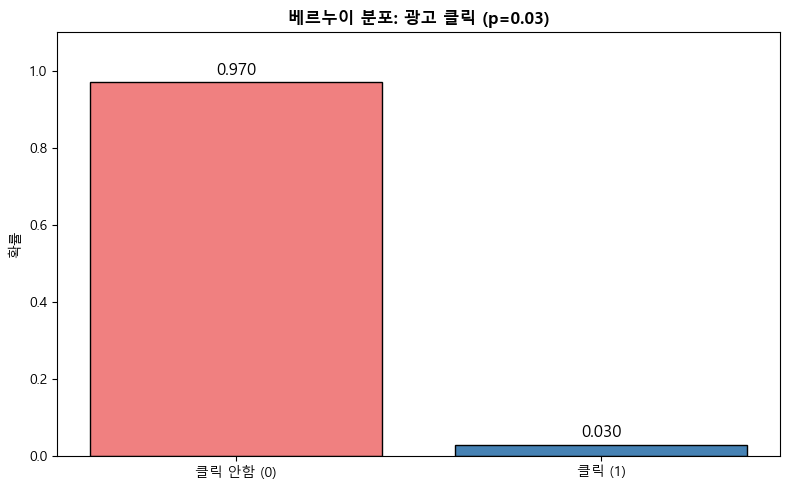

In [9]:
print("\n" + "="*60)
print("Part 4.1: 베르누이 분포")
print("="*60)

# 예제: 광고 클릭률 분석
print("\n[예제] 온라인 광고 클릭률")
print("광고 클릭률(CTR)이 3%일 때, 한 사용자가 클릭할 확률")

p_click = 0.03  # 클릭 확률

# scipy.stats를 이용한 베르누이 분포
be_dist = stats.bernoulli(p=p_click)

# (1) 클릭할 확률 P(X=1)
p_click_yes = be_dist.pmf(1)
print(p_click_yes) #0.03

# (2) 클릭하지 않을 확률 P(X=0)
p_click_no = be_dist.pmf(0)
print(p_click_no) #0.97

# (3) 기대값과 분산
mean_be = be_dist.mean()
var_be = be_dist.var()
print(f"기댓값:", mean_be)
print(f"분산:", var_be)
# 기댓값: 0.03
# 분산: 0.029099999999999997


# 시각화
fig, ax = plt.subplots(figsize=(8, 5))
x = [0, 1]
probs = [be_dist.pmf(0), be_dist.pmf(1)]
ax.bar(x, probs, color=['lightcoral', 'steelblue'], edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xticklabels(['클릭 안함 (0)', '클릭 (1)'])
ax.set_ylabel('확률')
ax.set_title(f'베르누이 분포: 광고 클릭 (p={p_click})', fontweight='bold')
for i, prob in enumerate(probs):
    ax.text(i, prob + 0.02, f'{prob:.3f}', ha='center', fontsize=12)
ax.set_ylim(0, 1.1)
plt.tight_layout()
plt.show()


### 4.2 이항 분포 (Binomial Distribution)

**"n번 시행 중 성공 횟수"**

$X \sim Binomial(n, p)$

| 속성       | 값                                              |
|------------|-------------------------------------------------|
| **PMF**    | $P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}$        |
| **기대값** | $E[X] = np$                                    |
| **분산**   | $Var(X) = np(1-p)$                             |
> $\binom{n}{k} = {}_nC_k = \frac{n!}{k!(n-k)!}$ : n개 중 k개를 순서 상관없이 뽑는 경우의 수 (조합)

**실용 예제**: 불량품 검사, A/B 테스트 전환율, 설문조사 찬성률

<img src="images/pr_02/이항분포_예시.png" width="60%">

In [10]:
print("\n" + "="*60)
print("Part 4.2: 이항 분포")
print("="*60)

# 실습 1: 불량품 검사
print("\n[실습 1] 불량품 검사")
print("불량률 3%인 공장에서 100개 샘플을 검사할 때")

n_samples = 100
defect_rate = 0.03

# scipy.stats를 이용한 이항 분포
binom_dist = stats.binom(n=n_samples, p=defect_rate)

# (1) 불량품이 정확히 3개일 확률
print(f"불량품이 정확히 3개일 확률", binom_dist.pmf(3))

# (2) 불량품이 5개 이하일 확률 (CDF 사용)
print(f"불량품이 5개 이하일 확률", binom_dist.cdf(5))

# (3) 불량품이 10개 이상일 확률
# P(x >= 10) = 1 - cdf(9)
# cdf(10) 하면 안되는이유!
print(f"불량품이 10개 이상 확률", 1-binom_dist.cdf(9))
print(f"불량품이 10개 이상 확률", binom_dist.sf(9)) 

# (4) 기대값과 표준편차
mean_binom = binom_dist.mean()
std_binom = binom_dist.std()
print('기댓값', mean_binom)
print('표준편차', std_binom)


Part 4.2: 이항 분포

[실습 1] 불량품 검사
불량률 3%인 공장에서 100개 샘플을 검사할 때
불량품이 정확히 3개일 확률 0.22747412748216383
불량품이 5개 이하일 확률 0.9191628710986265
불량품이 10개 이상 확률 0.0008740584737356727
불량품이 10개 이상 확률 0.000874058473735697
기댓값 3.0
표준편차 1.705872210923198


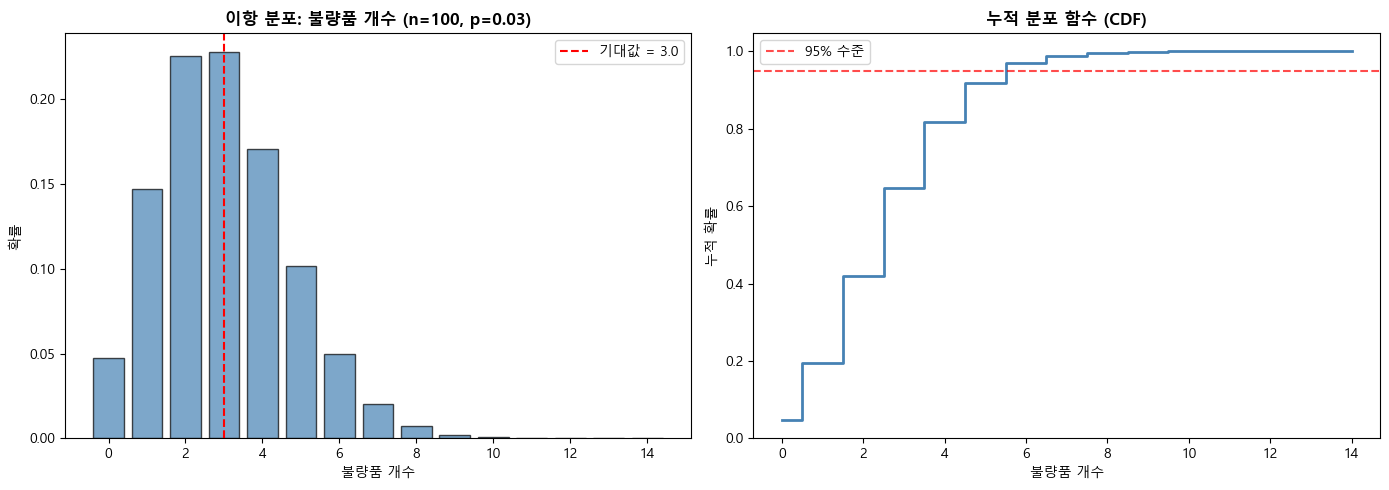

In [11]:
# 시각화: 불량품 개수 분포
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PMF 그래프
k = np.arange(0, 15)
pmf = binom_dist.pmf(k)
axes[0].bar(k, pmf, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(n_samples * defect_rate, color='red', linestyle='--',
                label=f'기대값 = {n_samples * defect_rate:.1f}')
axes[0].set_xlabel('불량품 개수')
axes[0].set_ylabel('확률')
axes[0].set_title('이항 분포: 불량품 개수 (n=100, p=0.03)', fontweight='bold')
axes[0].legend()

# CDF 그래프
cdf = binom_dist.cdf(k)
axes[1].step(k, cdf, where='mid', color='steelblue', linewidth=2)
axes[1].axhline(0.95, color='red', linestyle='--', alpha=0.7, label='95% 수준')
axes[1].set_xlabel('불량품 개수')
axes[1].set_ylabel('누적 확률')
axes[1].set_title('누적 분포 함수 (CDF)', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

### 4.3 포아송 분포 (Poisson Distribution)

**"단위 시간/공간당 발생 횟수"**

$X \sim Poisson(\lambda)$

| 속성       | 값                                               |
|------------|--------------------------------------------------|
| **PMF**    | $P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$   |
| **기대값** | $E[X] = \lambda$                                |
| **분산**   | $Var(X) = \lambda$                              |

**특징**: 기대값 = 분산 = λ

**실용 예제**: 콜센터 시간당 통화량, 웹사이트 분당 방문자, 페이지당 오타 수, 시간당 교통사고

<img src="images/pr_02/포아송_예시.png" width="60%">

In [12]:
print("\n" + "="*60)
print("Part 4.3: 포아송 분포")
print("="*60)

# 실습 1: 콜센터 운영
print("\n[실습 1] 콜센터 통화량 분석")
print("시간당 평균 전화 5통이 걸려올 때")

lambda_calls = 5  # 시간당 평균 통화량

# scipy.stats를 이용한 포아송 분포
poisson_dist = stats.poisson(mu=lambda_calls)

# (1) 정확히 5통이 걸려올 확률
print(poisson_dist.pmf(5))

# (2) 3통 이하가 걸려올 확률
print(poisson_dist.cdf(3))

# (3) 10통 이상 걸려올 확률 (바쁜 시간대)
print(poisson_dist.sf(9))

# (4) 기대값과 분산
print(poisson_dist.mean())
print(poisson_dist.var())


Part 4.3: 포아송 분포

[실습 1] 콜센터 통화량 분석
시간당 평균 전화 5통이 걸려올 때
0.17546736976785068
0.2650259152973615
0.03182805730620481
5.0
5.0


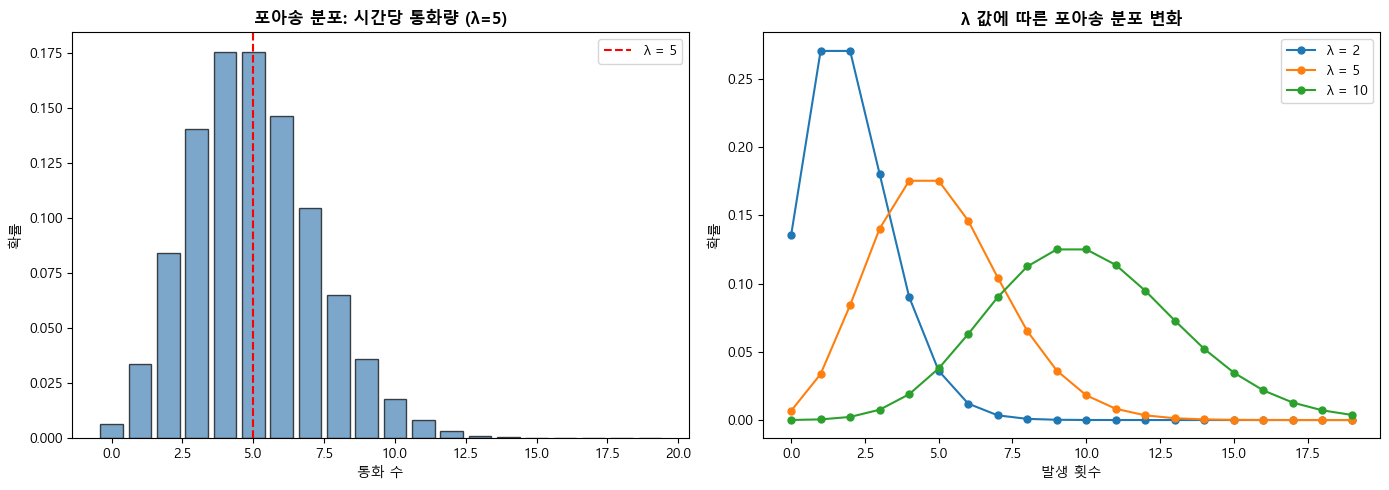

In [13]:
# 시각화: 콜센터 통화량 분포
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PMF
k = np.arange(0, 20)
pmf = poisson_dist.pmf(k)
axes[0].bar(k, pmf, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(lambda_calls, color='red', linestyle='--', label=f'λ = {lambda_calls}')
axes[0].set_xlabel('통화 수')
axes[0].set_ylabel('확률')
axes[0].set_title(f'포아송 분포: 시간당 통화량 (λ={lambda_calls})', fontweight='bold')
axes[0].legend()

# 다양한 λ 비교
for lam in [2, 5, 10]:
    pmf = stats.poisson.pmf(k, mu=lam)
    axes[1].plot(k, pmf, 'o-', label=f'λ = {lam}', markersize=5)
axes[1].set_xlabel('발생 횟수')
axes[1].set_ylabel('확률')
axes[1].set_title('λ 값에 따른 포아송 분포 변화', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()


In [14]:
# 실습 2: 웹사이트 서버 용량 계획
# 시나리오: 우리 웹사이트에 분당 평균 100명이 방문한다.
# 서버가 동시에 처리할 수 있는 최대 용량(몇명을 기준으로)을 얼마로 설정해야 과부하 없이 안정적으로 운영할 수 있을까?
# 평균 100 명 --> 분당 200명?


print("\n[실습 2] 웹사이트 서버 용량 계획")
print("=" * 50)

# 포아송 분포의 핵심 파라미터: λ (lambda) = 단위 시간당 평균 발생 횟수
# 여기서는 "분당 평균 방문자 수"
lambda_visitors = 100

print(f"분당 평균 방문자 수 (λ): {lambda_visitors}명")
print(f"포아송 분포 특징: 기대값 = 분산 = λ = {lambda_visitors}")
print(f"표준편차: √λ = √{lambda_visitors} = {lambda_visitors**0.5:.2f}명")

# ─────────────────────────────────────────────
# 1단계: 특정 방문자 수가 나올 확률 확인
# ─────────────────────────────────────────────
print("\n[1단계] 특정 방문자 수가 나올 확률")
print("-" * 50)

# stats.poisson.pmf(k, mu) : 정확히 k명이 방문할 확률
# pmf = Probability Mass Function (확률질량함수)
for k in [80, 90, 100, 110, 120]:
    prob = stats.poisson.pmf(k, mu=lambda_visitors)
    print(f"  정확히 {k:>3d}명 방문할 확률: {prob:.4f} ({prob*100:.2f}%)")

# ─────────────────────────────────────────────
# 2단계: 누적 확률로 서버 용량 결정
# ─────────────────────────────────────────────
print("\n[2단계] 누적 확률로 서버 용량 결정")
print("-" * 50)

# stats.poisson.cdf(k, mu) : k명 이하가 방문할 확률 (누적)
# cdf = Cumulative Distribution Function (누적분포함수)
for k in [110, 115, 120, 125, 130]:
    cum_prob = stats.poisson.cdf(k, mu=lambda_visitors)
    print(f"  {k:>3d}명 이하로 방문할 확률: {cum_prob:.4f} ({cum_prob*100:.2f}%)")

# ─────────────────────────────────────────────
# 3단계: 목표 안정성에 맞는 용량 역산 (핵심!)
# ─────────────────────────────────────────────
print("\n[3단계] 목표 안정성에 맞는 서버 용량 역산")
print("-" * 50)

# stats.poisson.ppf(확률, mu) : 해당 확률을 만족하는 최소 k값
# ppf = Percent Point Function (백분위 함수) = cdf의 역함수
# "이 용량이면 해당 확률만큼은 안전하다"는 의미

for confidence in [0.95, 0.99, 0.999]:
    capacity = stats.poisson.ppf(confidence, mu=lambda_visitors)
    overflow_prob = (1 - confidence) * 100
    print(f"  {confidence*100:.1f}% 안정성 → 서버 용량: {capacity:.0f}명"
          f" (과부하 확률: {overflow_prob:.1f}%)")

# ─────────────────────────────────────────────
# 결론
# ─────────────────────────────────────────────
capacity_99 = stats.poisson.ppf(0.99, mu=lambda_visitors)
print("\n[결론]")
print("=" * 50)
print(f"분당 평균 {lambda_visitors}명 방문하는 서버에서")
print(f"99% 안정성을 원하면 → 서버 용량을 {capacity_99:.0f}명으로 설정")
print(f"즉, 분당 방문자가 {capacity_99:.0f}명을 초과할 확률은 1% 미만이다.")


[실습 2] 웹사이트 서버 용량 계획
분당 평균 방문자 수 (λ): 100명
포아송 분포 특징: 기대값 = 분산 = λ = 100
표준편차: √λ = √100 = 10.00명

[1단계] 특정 방문자 수가 나올 확률
--------------------------------------------------
  정확히  80명 방문할 확률: 0.0052 (0.52%)
  정확히  90명 방문할 확률: 0.0250 (2.50%)
  정확히 100명 방문할 확률: 0.0399 (3.99%)
  정확히 110명 방문할 확률: 0.0234 (2.34%)
  정확히 120명 방문할 확률: 0.0056 (0.56%)

[2단계] 누적 확률로 서버 용량 결정
--------------------------------------------------
  110명 이하로 방문할 확률: 0.8529 (85.29%)
  115명 이하로 방문할 확률: 0.9368 (93.68%)
  120명 이하로 방문할 확률: 0.9773 (97.73%)
  125명 이하로 방문할 확률: 0.9932 (99.32%)
  130명 이하로 방문할 확률: 0.9983 (99.83%)

[3단계] 목표 안정성에 맞는 서버 용량 역산
--------------------------------------------------
  95.0% 안정성 → 서버 용량: 117명 (과부하 확률: 5.0%)
  99.0% 안정성 → 서버 용량: 124명 (과부하 확률: 1.0%)
  99.9% 안정성 → 서버 용량: 132명 (과부하 확률: 0.1%)

[결론]
분당 평균 100명 방문하는 서버에서
99% 안정성을 원하면 → 서버 용량을 124명으로 설정
즉, 분당 방문자가 124명을 초과할 확률은 1% 미만이다.


---

## Part 5: 연속형 확률분포

### 5.1 균등 분포 (Uniform Distribution)

**"모든 값이 동일한 확률"**

$X \sim Uniform(a, b)$

| 속성       | 값                                              |
|------------|-------------------------------------------------|
| **PDF**    | $f(x) = \frac{1}{b-a}$ ($a \leq x \leq b$일 때) |
| **기대값** | $E[X] = \frac{a+b}{2}$                         |
| **분산**   | $Var(X) = \frac{(b-a)^2}{12}$                  |

**실용 예제**: 난수 생성, 버스 랜덤 도착, 룰렛

<img src="images/pr_02/균등분포_예시.png" width="50%">

In [15]:
print("\n" + "=" * 60)
print("Part 5.1: 균등 분포")
print("=" * 60)

print("\n[실습] 버스 대기 시간")
print("버스 배차 간격: 10분")
print("승객이 랜덤한 시간에 도착할 때 대기 시간의 분포")

a, b = 0, 10  # 대기 시간 범위: 0분 ~ 10분

# scipy.stats로 균등 분포 생성
uni_dist = stats.uniform(loc=a, scale=b-a)

# (1) 5분 이내에 버스가 올 확률
print(uni_dist.cdf(5))

# (2) 7분 이상 기다릴 확률
print(uni_dist.sf(7))
print(1-uni_dist.cdf(7))

# (3) 평균 대기 시간 (기대값)
print(uni_dist.mean())


# (4) 대기 시간의 표준편차
print(uni_dist.std()) #2.8


Part 5.1: 균등 분포

[실습] 버스 대기 시간
버스 배차 간격: 10분
승객이 랜덤한 시간에 도착할 때 대기 시간의 분포
0.5
0.30000000000000004
0.30000000000000004
5.0
2.8867513459481287


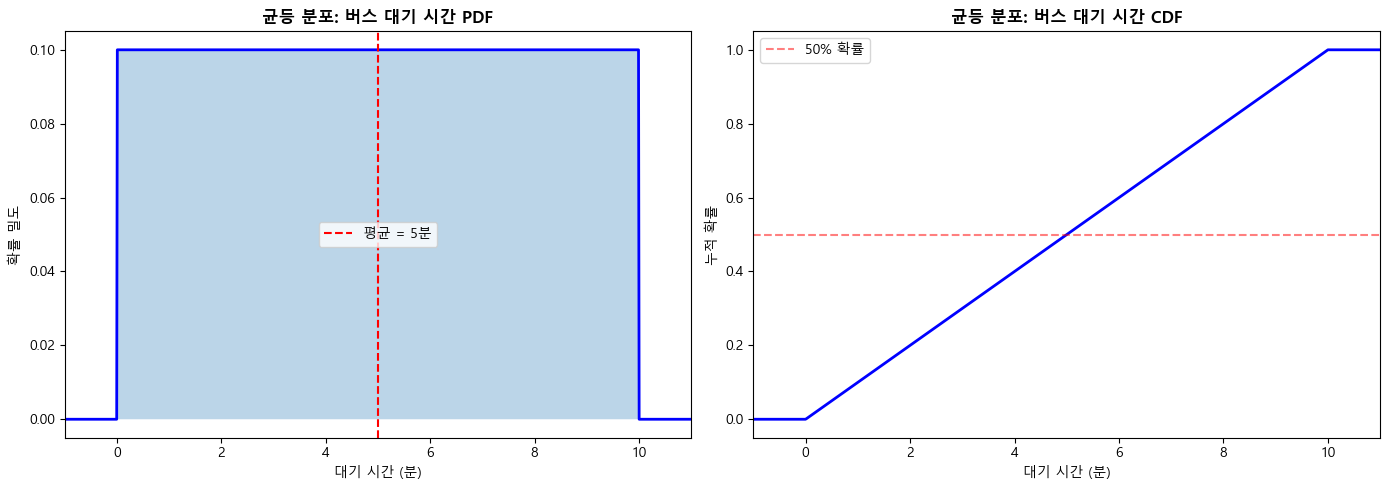

In [16]:
# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(-1, 11, 1000)

# PDF
pdf = uni_dist.pdf(x)
axes[0].plot(x, pdf, 'b-', linewidth=2)
axes[0].fill_between(x, pdf, alpha=0.3)
axes[0].axvline(5, color='red', linestyle='--', label='평균 = 5분')
axes[0].set_xlabel('대기 시간 (분)')
axes[0].set_ylabel('확률 밀도')
axes[0].set_title('균등 분포: 버스 대기 시간 PDF', fontweight='bold')
axes[0].legend()
axes[0].set_xlim(-1, 11)

# CDF
cdf = uni_dist.cdf(x)
axes[1].plot(x, cdf, 'b-', linewidth=2)
axes[1].axhline(0.5, color='red', linestyle='--', alpha=0.5, label='50% 확률')
axes[1].set_xlabel('대기 시간 (분)')
axes[1].set_ylabel('누적 확률')
axes[1].set_title('균등 분포: 버스 대기 시간 CDF', fontweight='bold')
axes[1].legend()
axes[1].set_xlim(-1, 11)

plt.tight_layout()
plt.show()


### 5.2 지수 분포 (Exponential Distribution)

**"사건 간 대기 시간"**

$X \sim Exponential(\lambda)$

| 속성       | 값                                                  |
|------------|-----------------------------------------------------|
| **PDF**    | $f(x) = \lambda e^{-\lambda x}$ ($x \geq 0$일 때) |
| **기대값** | $E[X] = \frac{1}{\lambda}$                         |
| **분산**   | $Var(X) = \frac{1}{\lambda^2}$                     |

**특징**: **무기억성** — 지금까지 기다린 시간은 앞으로 기다릴 시간에 영향을 주지 않는다.

**실용 예제**: 고객 도착 간격, 기계 고장까지 시간, 전화 통화 간격

> **포아송과의 관계**: 단위 시간당 λ번 발생하면, 사건 사이의 간격은 지수분포를 따른다 (평균 간격 = 1/λ).
>
> **scipy 주의**: `stats.expon(scale=β)`에서 `scale = 1/λ = 평균 대기시간`

<img src="images/pr_02/지수분포_예시.png" width="50%">

In [17]:
print("\n" + "="*60)
print("Part 5.2: 지수 분포")
print("="*60)

# 실습: 기계 수명 분석
print("\n[실습] 기계 수명 분석")
print("기계의 평균 수명: 1000시간")
print("(즉, 시간당 고장률 scale = 1/1000 = 0.001)")

mean_lifetime = 1000  # 평균 수명 (시간)
lambda_rate = 1 / mean_lifetime

# scipy.stats를 이용한 지수 분포
# scipy에서는 scale = 1/lambda = 대기시간 
exp_dist = stats.expon(scale=mean_lifetime)

# (1) 500시간 이내에 고장날 확률
print(exp_dist.cdf(500))

# (2) 1500시간 이상 작동할 확률
print(exp_dist.sf(1500)) #1 - (1500시간 내에 고장날 확률)

# (3) 기대값과 표준편차
print(exp_dist.mean())
print(exp_dist.std())

# (4) 중앙값 (50%가 고장나는 시점)
print(exp_dist.median()) #전체의 50%가 고장나는 시점


Part 5.2: 지수 분포

[실습] 기계 수명 분석
기계의 평균 수명: 1000시간
(즉, 시간당 고장률 scale = 1/1000 = 0.001)
0.3934693402873666
0.22313016014842982
1000.0
1000.0
693.1471805599452


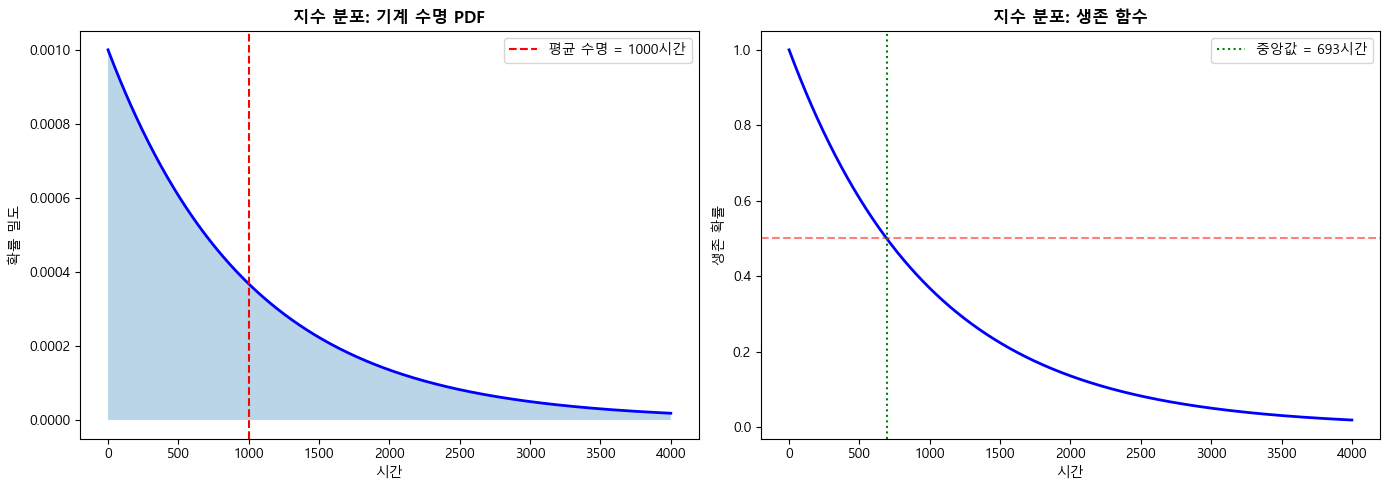

In [18]:
# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(0, 4000, 1000) #0이상, 4000이하, 1000등분해서 1000개의 데이터를 생성

# PDF
pdf = exp_dist.pdf(x)
axes[0].plot(x, pdf, 'b-', linewidth=2)
axes[0].fill_between(x, pdf, alpha=0.3)
axes[0].axvline(mean_lifetime, color='red', linestyle='--', label=f'평균 수명 = {mean_lifetime}시간')
axes[0].set_xlabel('시간')
axes[0].set_ylabel('확률 밀도')
axes[0].set_title('지수 분포: 기계 수명 PDF', fontweight='bold')
axes[0].legend()

# 생존 함수 (1 - CDF)
survival = 1 - exp_dist.cdf(x)
axes[1].plot(x, survival, 'b-', linewidth=2)
axes[1].axhline(0.5, color='red', linestyle='--', alpha=0.5)
axes[1].axvline(exp_dist.median(), color='green', linestyle=':', label=f'중앙값 = {exp_dist.median():.0f}시간')
axes[1].set_xlabel('시간')
axes[1].set_ylabel('생존 확률')
axes[1].set_title('지수 분포: 생존 함수', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()


포아송 - 단위 시간 동안 몇 번 일어날까?
지수 - 한 번 일어날 때 얼마나 걸릴까?

포아송의 lambda -> 단위 시간당 평균 lambda번 발생
지수분포의 1/lambda -> 사건이 발생하기 까지 걸리는 평균 시간 (포아송의 람다를 알고있는경우 대기 시간  1/lambda)

 ### 5.3 정규 분포 (Normal Distribution)

**"자연현상의 기본 분포"**

$X \sim Normal(\mu, \sigma^2)$

| 속성       | 값                                                                         |
|------------|----------------------------------------------------------------------------|
| **PDF**    | $f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$   |
| **기대값** | $E[X] = \mu$                                                              |
| **분산**   | $Var(X) = \sigma^2$                                                       |

**특징**:
- 평균을 중심으로 좌우 대칭
- 평균 = 중앙값 = 최빈값
- 종 모양 (bell curve)

**실용 예제**: 키, 몸무게, 시험 점수, 측정 오차, 주가 수익률

 <img src="images/pr_02/정규분포_예시.png" width="50%">

In [19]:
print("\n" + "="*60)
print("Part 5.3: 정규 분포")
print("="*60)

# 실습: 성인 남성 키 분포
print("\n[실습] 한국 성인 남성 키 분포")
print("평균: 173cm, 표준편차: 6cm")

mu = 173
sigma = 6

# scipy.stats를 이용한 정규 분포
norm_dist = stats.norm(loc=mu, scale=sigma)

# (1) 180cm 이상일 확률
p_above_180 = norm_dist.sf(180)
print(p_above_180)

# (2) 165cm ~ 180cm 사이일 확률
p_between_165_180 = norm_dist.cdf(180) - norm_dist.cdf(165)
print(p_between_165_180)

# (3) 상위 10%에 해당하는 키
top_10_height = norm_dist.ppf(0.9)
print(top_10_height)

# (4) 하위 5%에 해당하는 키
bottom_5_height = norm_dist.ppf(0.05)
print(bottom_5_height)


Part 5.3: 정규 분포

[실습] 한국 성인 남성 키 분포
평균: 173cm, 표준편차: 6cm
0.12167250457438122
0.787116275699751
180.6893093932676
163.13087823829116


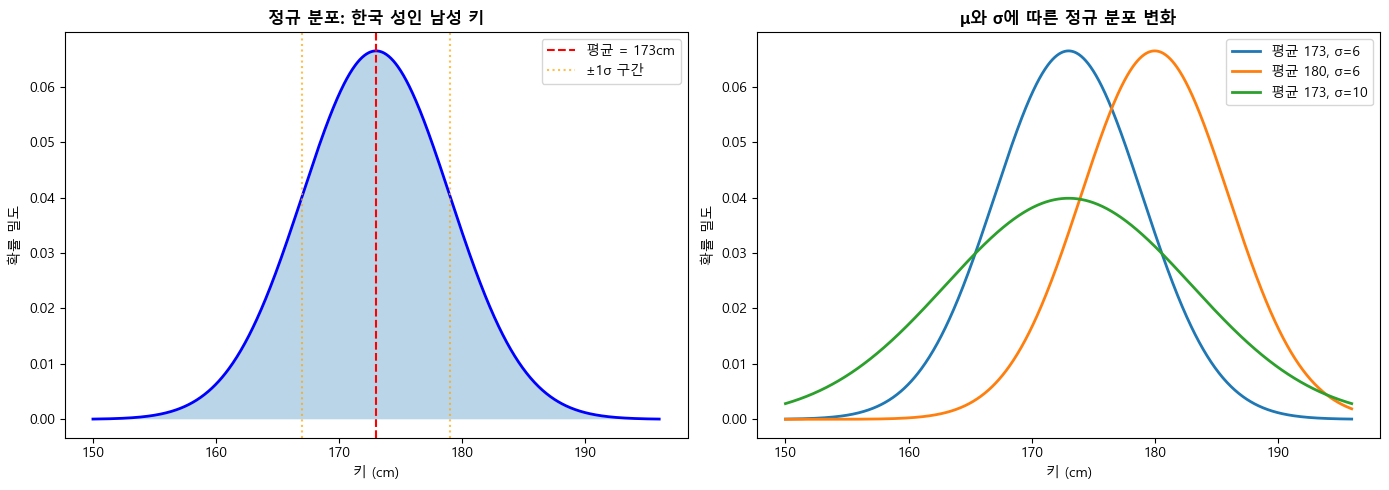

In [20]:
# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(150, 196, 1000)

# PDF
pdf = norm_dist.pdf(x)
axes[0].plot(x, pdf, 'b-', linewidth=2)
axes[0].fill_between(x, pdf, alpha=0.3)
axes[0].axvline(mu, color='red', linestyle='--', label=f'평균 = {mu}cm')
axes[0].axvline(mu - sigma, color='orange', linestyle=':', alpha=0.7)
axes[0].axvline(mu + sigma, color='orange', linestyle=':', alpha=0.7, label=f'±1σ 구간')
axes[0].set_xlabel('키 (cm)')
axes[0].set_ylabel('확률 밀도')
axes[0].set_title('정규 분포: 한국 성인 남성 키', fontweight='bold')
axes[0].legend()

# 다양한 μ, σ 비교
params = [(173, 6, '평균 173, σ=6'), (180, 6, '평균 180, σ=6'), (173, 10, '평균 173, σ=10')]
for mu_i, sigma_i, label in params:
    pdf = stats.norm.pdf(x, loc=mu_i, scale=sigma_i)
    axes[1].plot(x, pdf, linewidth=2, label=label)
axes[1].set_xlabel('키 (cm)')
axes[1].set_ylabel('확률 밀도')
axes[1].set_title('μ와 σ에 따른 정규 분포 변화', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()


---

## Part 6: 정규분포 심화

### 1. 68-95-99.7 법칙 (경험적 규칙)

정규분포에서 데이터가 평균 주변에 얼마나 모여있는지 나타내는 규칙:

| 구간                | 확률           |
|---------------------|----------------|
| $\mu \pm 1\sigma$  | 약 **68%**     |
| $\mu \pm 2\sigma$  | 약 **95%**     |
| $\mu \pm 3\sigma$  | 약 **99.7%**   |

> 평균에서 표준편차 1개 범위 안에 전체의 68%, 2개면 95%, 3개면 거의 전부(99.7%)가 들어온다. 이 규칙만 알면 정규분포 데이터를 계산 없이 빠르게 파악할 수 있다.

<img src="images/pr_02/68_95_99.7_법칙.png" width="50%">

In [21]:
print("\n" + "="*60)
print("Part 6: 정규분포 심화")
print("="*60)

# 68-95-99.7 법칙 검증
print("\n[68-95-99.7 법칙 검증]")

standard_normal = stats.norm(0, 1)

# 각 구간의 확률 계산
p_1sigma = standard_normal.cdf(1) - standard_normal.cdf(-1)
p_2sigma = standard_normal.cdf(2) - standard_normal.cdf(-2)
p_3sigma = standard_normal.cdf(3) - standard_normal.cdf(-3)

print(f"±1σ 구간 확률: {p_1sigma:.4f} = {p_1sigma*100:.2f}% (≈ 68%)")
print(f"±2σ 구간 확률: {p_2sigma:.4f} = {p_2sigma*100:.2f}% (≈ 95%)")
print(f"±3σ 구간 확률: {p_3sigma:.4f} = {p_3sigma*100:.2f}% (≈ 99.7%)")



Part 6: 정규분포 심화

[68-95-99.7 법칙 검증]
±1σ 구간 확률: 0.6827 = 68.27% (≈ 68%)
±2σ 구간 확률: 0.9545 = 95.45% (≈ 95%)
±3σ 구간 확률: 0.9973 = 99.73% (≈ 99.7%)


### 2. 표준화와 Z-score

**표준화**: 어떤 정규분포든 표준정규분포 $N(0,1)$로 변환하는 과정

$Z = \frac{X - \mu}{\sigma}$

**Z-score의 의미**: 평균에서 표준편차 몇 개만큼 떨어져 있는지를 나타내는 값

| Z-score | 의미                                  |
|---------|---------------------------------------|
| Z = 0   | 평균과 같음                           |
| Z = 1   | 평균보다 1σ 높음 (상위 약 16%)       |
| Z = 2   | 평균보다 2σ 높음 (상위 약 2.5%)      |
| Z = -1  | 평균보다 1σ 낮음 (하위 약 16%)       |

> **예시**: 시험 평균 70점, 표준편차 10점일 때 내 점수가 90점이면 $Z = \frac{90 - 70}{10} = 2$이다. 평균보다 표준편차 2개만큼 위에 있으므로 상위 약 2.5%에 해당한다.

<img src="images/pr_02/Z_score_개념.png" width="50%">

In [28]:
# Z-score 계산 및 활용
print("\n[Z-score 실습]")
print("시험 점수: 평균 70점, 표준편차 10점")
print("내 점수: 85점")

mu = 70
sigma = 10
my_score = 85

# (1) Z-score 계산
z_score = (my_score - mu) / sigma
print(f"z-score:", z_score)

# (2) 상위 몇 %인지 계산
top_percentile = stats.norm.sf(z_score) #P(Z > z_score)
print(f"상위 %:", top_percentile)

# (3) 상위 10%가 되려면 몇 점 필요?
z_top10_score = stats.norm.ppf(1 - 0.1)
print(f"상위 10%의 점수:", z_top10_score)


[Z-score 실습]
시험 점수: 평균 70점, 표준편차 10점
내 점수: 85점
z-score: 1.5
상위 %: 0.06680720126885806
상위 10%의 점수: 1.2815515655446004


In [ ]:
# 실습: 두 과목 점수 비교
print("\n[실습] 두 과목 점수 비교")
print("국어: 80점 (평균 75, 표준편차 5)")
print("수학: 85점 (평균 70, 표준편차 15)")
print("어느 과목이 상대적으로 더 잘 본 걸까?")

# 국어 Z-score
z_korean = (80 - 75) / 5

# 수학 Z-score
z_math = (85 - 70) / 15

# 결론
print(f"국어 Z-score:", z_korean)
print(f"수학 Z-score:", z_math)

# 수학이 절대값은 높았으나 상대적으로는 똑같이 잘 본 것임! 왜냐하면 z_score가 동일하기 때문.



[실습] 두 과목 점수 비교
국어: 80점 (평균 75, 표준편차 5)
수학: 85점 (평균 70, 표준편차 15)
어느 과목이 상대적으로 더 잘 본 걸까?
국어 Z-score: 1.0
수학 Z-score: 1.0


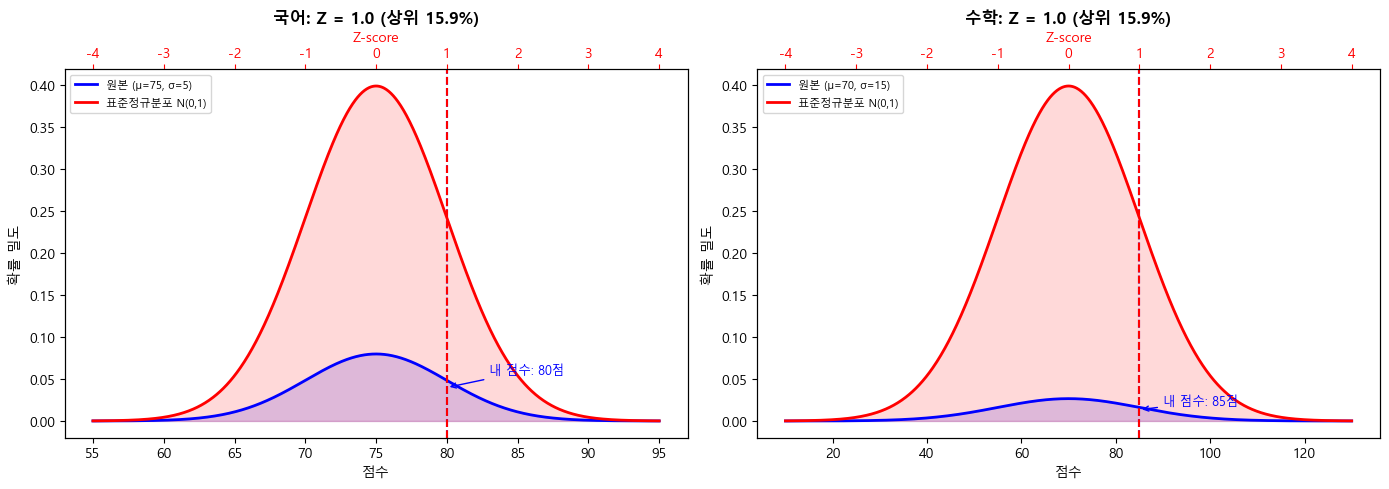

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ─────────────────────────────────────────────
# 국어: 원본 분포 + Z-표준화 분포 겹치기
# ─────────────────────────────────────────────
mu_k, sigma_k, score_k = 75, 5, 80
z_k = (score_k - mu_k) / sigma_k  # Z = 1.0

# 원본 분포 (파란색)
x_k = np.linspace(mu_k - 4*sigma_k, mu_k + 4*sigma_k, 1000)
y_k = stats.norm.pdf(x_k, mu_k, sigma_k)
axes[0].plot(x_k, y_k, 'b-', linewidth=2, label=f'원본 (μ={mu_k}, σ={sigma_k})')
axes[0].fill_between(x_k, y_k, alpha=0.15, color='blue')
axes[0].axvline(score_k, color='blue', linestyle='--', linewidth=1.5)
axes[0].annotate(f'내 점수: {score_k}점', xy=(score_k, max(y_k)*0.5),
                 xytext=(score_k + 3, max(y_k)*0.7),
                 arrowprops=dict(arrowstyle='->', color='blue'), color='blue', fontsize=9)

# Z-표준화 분포 (빨간색) — x축을 원본 스케일에 맞춰 겹침
x_z = np.linspace(-4, 4, 1000)
x_z_mapped = x_z * sigma_k + mu_k  # Z축을 원본 스케일로 변환
y_z = stats.norm.pdf(x_z, 0, 1)
axes[0].plot(x_z_mapped, y_z, 'r-', linewidth=2, label='표준정규분포 N(0,1)')
axes[0].fill_between(x_z_mapped, y_z, alpha=0.15, color='red')
axes[0].axvline(z_k * sigma_k + mu_k, color='red', linestyle='--', linewidth=1.5)

# 상단에 Z축 표시
ax0_z = axes[0].twiny()
ax0_z.set_xlim((axes[0].get_xlim()[0] - mu_k) / sigma_k,
               (axes[0].get_xlim()[1] - mu_k) / sigma_k)
ax0_z.set_xlabel('Z-score', color='red', fontsize=10)
ax0_z.tick_params(axis='x', colors='red')

axes[0].set_xlabel('점수')
axes[0].set_ylabel('확률 밀도')
axes[0].set_title(f'국어: Z = {z_k:.1f} (상위 {stats.norm.sf(z_k)*100:.1f}%)', fontweight='bold')
axes[0].legend(loc='upper left', fontsize=8)

# ─────────────────────────────────────────────
# 수학: 원본 분포 + Z-표준화 분포 겹치기
# ─────────────────────────────────────────────
mu_m, sigma_m, score_m = 70, 15, 85
z_m = (score_m - mu_m) / sigma_m  # Z = 1.0

# 원본 분포 (파란색)
x_m = np.linspace(mu_m - 4*sigma_m, mu_m + 4*sigma_m, 1000)
y_m = stats.norm.pdf(x_m, mu_m, sigma_m)
axes[1].plot(x_m, y_m, 'b-', linewidth=2, label=f'원본 (μ={mu_m}, σ={sigma_m})')
axes[1].fill_between(x_m, y_m, alpha=0.15, color='blue')
axes[1].axvline(score_m, color='blue', linestyle='--', linewidth=1.5)
axes[1].annotate(f'내 점수: {score_m}점', xy=(score_m, max(y_m)*0.5),
                 xytext=(score_m + 5, max(y_m)*0.7),
                 arrowprops=dict(arrowstyle='->', color='blue'), color='blue', fontsize=9)

# Z-표준화 분포 (빨간색)
x_z_mapped_m = x_z * sigma_m + mu_m
axes[1].plot(x_z_mapped_m, y_z, 'r-', linewidth=2, label='표준정규분포 N(0,1)')
axes[1].fill_between(x_z_mapped_m, y_z, alpha=0.15, color='red')
axes[1].axvline(z_m * sigma_m + mu_m, color='red', linestyle='--', linewidth=1.5)

# 상단에 Z축 표시
ax1_z = axes[1].twiny()
ax1_z.set_xlim((axes[1].get_xlim()[0] - mu_m) / sigma_m,
               (axes[1].get_xlim()[1] - mu_m) / sigma_m)
ax1_z.set_xlabel('Z-score', color='red', fontsize=10)
ax1_z.tick_params(axis='x', colors='red')

axes[1].set_xlabel('점수')
axes[1].set_ylabel('확률 밀도')
axes[1].set_title(f'수학: Z = {z_m:.1f} (상위 {stats.norm.sf(z_m)*100:.1f}%)', fontweight='bold')
axes[1].legend(loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

### 3. 품질 관리와 Six Sigma (6σ)

**Six Sigma**는 제조 품질 관리에서 사용되는 방법론으로, 불량률을 극한까지 줄이는 것을 목표로 한다.

| 시그마 수준 | 규격 내 비율      | 백만 개당 불량 (DPMO) |
|-------------|-------------------|------------------------|
| 1σ          | 68.27%            | 317,300                |
| 2σ          | 95.45%            | 45,500                 |
| 3σ          | 99.73%            | 2,700                  |
| 4σ          | 99.9937%          | 63                     |
| 5σ          | 99.99994%         | 0.57                   |
| **6σ**      | **99.9999998%**   | **0.002**              |

> 시그마 수준이 높을수록 평균에서 규격 한계까지의 거리가 넓어져 불량이 거의 발생하지 않는다. 6σ는 백만 개 중 0.002개 불량으로, 사실상 완벽에 가까운 품질이다.
>
> **1.5σ shift와 DPMO 3.4**: 실제 공장에서는 온도 변화, 기계 마모, 원재료 차이 등으로 공정 평균이 시간에 따라 미세하게 흔들린다. 모토로라가 실제 데이터를 분석한 결과 이 이동량이 약 1.5σ였다. 따라서 6σ는 **설계 목표**이고, 평균이 1.5σ만큼 흘러도 최소 4.5σ 수준(DPMO 3.4 = 백만 개당 3.4개 불량)은 유지된다는 것이 핵심이다. 위 표는 이론적인 정규분포 기준이며, 실제 산업에서는 이 1.5σ shift를 반영한 DPMO 3.4를 6σ의 실제 기대 성능으로 사용한다.

<img src="images/pr_02/Six_Sigma.png" width="100%">


In [ ]:
# 품질 관리 실습
print("\n[품질 관리 실습]")
print("규격: 부품 길이 50mm ± 0.1mm (허용 오차)")
print("공정 능력: 평균 50mm, 표준편차 0.03mm")

target = 50
tolerance = 0.1
sigma_process = 0.03

# 규격 상한/하한
USL = target + tolerance  # Upper Spec Limit
LSL = target - tolerance  # Lower Spec Limit


# (1) 규격 내 합격률 계산 (규격내 제품의 비율)
norm_dist = stats.norm(loc=target, scale=sigma_process) # 현재 공장에 생산되는 제품의 분포
pass_rate = norm_dist.cdf(USL) - norm_dist.cdf(LSL)
print(f"pass_rate: {pass_rate:.6f}",) #pass_rate: 0.999142

# (2) 백만 개당 불량품 수 (DPMO)
dpmo = (1 - pass_rate) * 1000000
print("백 만 개 당 불량 (DPMO):", dpmo) #백 만 개 당 불량 (DPMO): 858.12

# (3) 이 공정은 몇 시그마 수준?
sigma_level = (USL - target) / sigma_process  # USL의 Z표준화 점수
# USL 대신 LSL 사용해도 동일한 값이 나옴(대칭이기 때문, -시그마 값으로 나옴)
print(f"공정 시그마 수준: {sigma_level:.2f}") #공정 시그마 수준: 3.33

# 6시그마로 공정을 설계하면 4.5 시그마 수준이 현실적인 수치. 그래도 3.33 수준으로 공정 능력은 높은 편이다.


[품질 관리 실습]
규격: 부품 길이 50mm ± 0.1mm (허용 오차)
공정 능력: 평균 50mm, 표준편차 0.03mm
pass_rate: 0.999142
백 만 개 당 불량 (DPMO): 858.1206663935692
공정 시그마 수준: 3.33


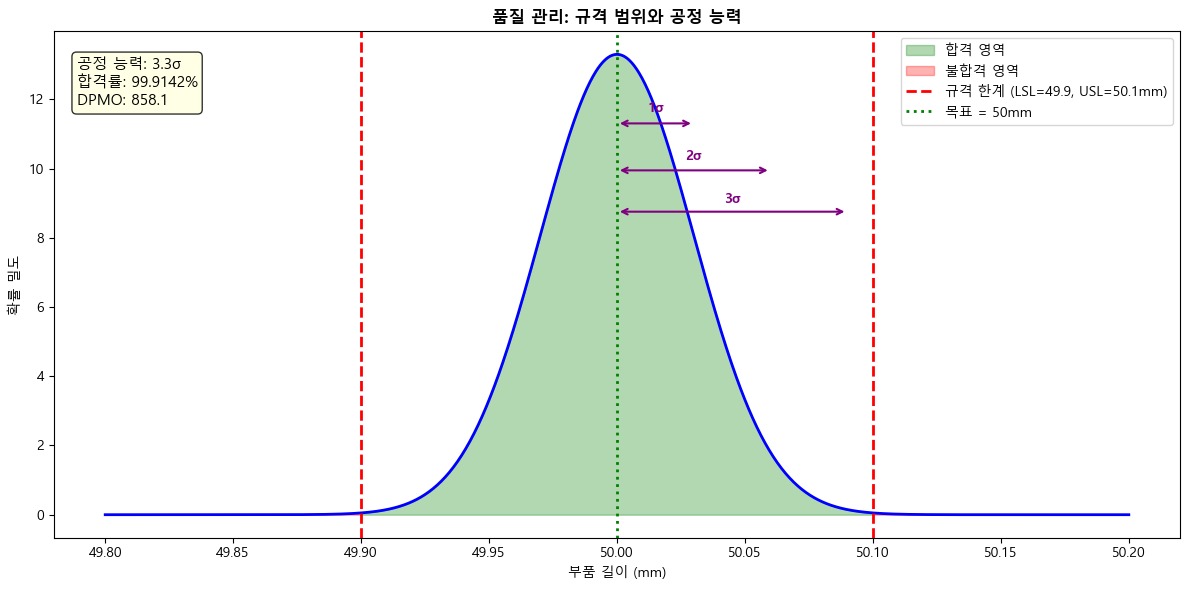

In [26]:
# 시각화: 품질 관리
fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(49.8, 50.2, 1000)
y = stats.norm.pdf(x, target, sigma_process)

# 시그마 수준 계산: 규격 한계가 평균에서 몇 σ 떨어져 있는지
sigma_level = (USL - target) / sigma_process

ax.plot(x, y, 'b-', linewidth=2)
ax.fill_between(x, y, where=(x >= LSL) & (x <= USL), alpha=0.3, color='green', label='합격 영역')
ax.fill_between(x, y, where=(x < LSL), alpha=0.3, color='red', label='불합격 영역')
ax.fill_between(x, y, where=(x > USL), alpha=0.3, color='red')

ax.axvline(LSL, color='red', linestyle='--', linewidth=2, label=f'규격 한계 (LSL={LSL}, USL={USL}mm)')
ax.axvline(USL, color='red', linestyle='--', linewidth=2)
ax.axvline(target, color='green', linestyle=':', linewidth=2, label=f'목표 = {target}mm')

# 시그마 수준 표시: 1σ ~ nσ 구간을 화살표로 표시
y_arrow = max(y) * 0.85
for i in range(1, int(sigma_level) + 1):
    ax.annotate('', xy=(target + i * sigma_process, y_arrow),
                xytext=(target, y_arrow),
                arrowprops=dict(arrowstyle='<->', color='purple', linewidth=1.5))
    ax.text(target + i * sigma_process / 2, y_arrow * 1.03,
            f'{i}σ', ha='center', fontsize=10, color='purple', fontweight='bold')
    y_arrow *= 0.88  # 각 화살표를 조금씩 아래로

# 시그마 수준 텍스트 박스
dpmo = stats.norm.sf(sigma_level) * 2 * 1_000_000  # 양쪽 꼬리
textstr = (f'공정 능력: {sigma_level:.1f}σ\n'
           f'합격률: {(1 - stats.norm.sf(sigma_level) * 2) * 100:.4f}%\n'
           f'DPMO: {dpmo:.1f}')
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.8)
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

ax.set_xlabel('부품 길이 (mm)')
ax.set_ylabel('확률 밀도')
ax.set_title('품질 관리: 규격 범위와 공정 능력', fontweight='bold')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

 ---



 ## Part 7: 종합 실습



 ### 1. 분포 간 관계



 - **이항 → 포아송 근사**: n이 크고 p가 작을 때 (np = λ)
 이항분포에서 
𝑛
n이 커지고 
𝑝
p가 작아지면,
개별 시행의 구조는 사라지고
“단위 시간(공간)당 평균 발생 횟수 
𝜆
λ”만 남아서
포아송 분포로 수렴한다.

 - **이항 → 정규 근사**: n이 충분히 클 때 (np ≥ 5, n(1-p) ≥ 5)

 - **포아송 → 정규 근사**: λ가 클 때 (λ ≥ 10)



 ![분포 파라미터 영향](images/pr_02/분포_파라미터_영향.png)



 ![이항분포 정규 근사](images/pr_02/이항분포_정규근사.png)

### 2. 중심극한정리 (Central Limit Theorem)

**"표본 크기가 충분히 크면, 표본평균의 분포는 정규분포에 가까워진다"**

모집단이 어떤 분포든 상관없이 성립한다.

$$\bar{X} \sim N\left(\mu, \frac{\sigma^2}{n}\right)$$

> 예를 들어 주사위 눈의 분포는 균등 분포(정규분포가 아님)이지만, 주사위를 30번 던져서 평균을 구하는 실험을 수천 번 반복하면 그 평균들의 분포는 정규분포 모양이 된다. 이것이 통계학에서 정규분포가 그토록 중요한 이유이다.

<img src="images/pr_02/중심극한정리.png" width="50%">

 ### 3. 분포 선택 연습문제



 다음 상황에서 어떤 분포를 사용해야 할까요?

In [27]:
situations = [
    "이메일 스팸 필터가 스팸을 정확히 분류할 확률 90%, 100개 이메일 중 스팸으로 분류되는 개수",
    "은행 창구에 시간당 평균 20명 방문, 30분 동안 10명 이상 방문할 확률",
    "전구의 평균 수명 1000시간, 500시간 이내에 고장날 확률",
    "한국 성인 여성 키 분포 (평균 160cm, 표준편차 5cm)",
    "랜덤 시간에 도착한 승객이 버스를 5분 이내에 탈 확률 (배차간격 15분)",
]

---

# 확률분포 핵심 함수 정리

## scipy.stats 사용법

| 메서드         | 풀네임 (영어)                   | 설명                            | 예시                                      |
|----------------|---------------------------------|---------------------------------|-------------------------------------------|
| `.pmf(k)`     | Probability Mass Function       | 확률질량함수 (이산)             | `binom.pmf(3, n=10, p=0.3)`              |
| `.pdf(x)`     | Probability Density Function    | 확률밀도함수 (연속)             | `norm.pdf(170, loc=173, scale=6)`         |
| `.cdf(x)`     | Cumulative Distribution Function | 누적분포함수 P(X≤x)           | `norm.cdf(180, loc=173, scale=6)`         |
| `.ppf(q)`     | Percent Point Function          | cdf의 역함수 (확률→값)         | `norm.ppf(0.9, loc=173, scale=6)`         |
| `.sf(x)`      | Survival Function               | 생존함수 P(X>x) = 1-CDF        | `norm.sf(180, loc=173, scale=6)`          |
| `.isf(q)`     | Inverse Survival Function       | sf의 역함수 (우측확률→값)      | `norm.isf(0.05, loc=173, scale=6)`        |
| `.interval(confidence)` | Confidence Interval    | 양측 신뢰구간                   | `t.interval(0.95, df=9, loc=5, scale=0.3)` |
| `.rvs(size)`  | Random Variates                 | 난수 생성                       | `norm.rvs(loc=173, scale=6, size=100)`    |
| `.mean()`     | Mean                            | 기대값                          | `binom(n=10, p=0.3).mean()`              |
| `.var()`      | Variance                        | 분산                            | `binom(n=10, p=0.3).var()`               |
| `.std()`      | Standard Deviation              | 표준편차                        | `binom(n=10, p=0.3).std()`               |

> **파라미터 설명**
> - `x`, `k`: 확률을 구하고 싶은 값 (연속: x, 이산: k)
> - `q`: 누적확률 (0~1 사이 값)
> - `loc`: 분포의 위치 (정규분포에서는 평균 μ)
> - `scale`: 분포의 척도 (정규분포에서는 표준편차 σ)
> - `df`: 자유도 (t분포, 카이제곱분포 등에서 사용)
> - `size`: 생성할 난수 개수
> - `confidence`: 신뢰수준 (예: 0.95 = 95%)
> - `n`, `p`: 이항분포의 시행 횟수와 성공 확률

## 주요 분포 생성

```python
from scipy import stats

# 이산형
bernoulli = stats.bernoulli(p=0.3)       # 베르누이: 성공확률 0.3인 1회 시행
binom = stats.binom(n=10, p=0.3)         # 이항분포: 10회 시행, 성공확률 0.3
poisson = stats.poisson(mu=5)            # 포아송: 평균 발생 횟수 5

# 연속형
uniform = stats.uniform(loc=0, scale=10)  # 균등분포: U(0, 10), loc=시작, scale=구간 길이
expon = stats.expon(scale=100)            # 지수분포: scale=1/λ (평균 대기시간), 평균 100분
norm = stats.norm(loc=170, scale=6)       # 정규분포: N(170, 6²), loc=평균, scale=표준편차
```

## 확률 계산 팁

```python
# P(X = k) - 정확히 k가 나올 확률 (이산형만 사용 가능)
dist.pmf(k)

# P(X ≤ x) - x 이하일 확률 (누적)
dist.cdf(x)

# P(X > x) - x 초과일 확률
dist.sf(x)  # 또는 1 - dist.cdf(x)

# P(X ≥ x) - x 이상일 확률
# 연속형: P(X ≥ x) = P(X > x) → dist.sf(x)  (한 점의 확률 = 0이므로 초과와 같음)
# 이산형: P(X ≥ k) = P(X > k-1) → dist.sf(k - 1)  (또는 1 - dist.cdf(k - 1))

# P(a ≤ X ≤ b) - a 이상 b 이하일 확률
dist.cdf(b) - dist.cdf(a)

# 상위 p%에 해당하는 값 (예: 상위 5% → p=5)
dist.ppf(1 - p/100)

# 하위 p%에 해당하는 값 (예: 하위 10% → p=10)
dist.ppf(p/100)
```

---

# 실습 완료!

이것으로 2회차 이론 실습이 끝났습니다.

**실습 과제**는 `practice_02_assignment.ipynb` 파일에서 풀어보세요.

| 과제       | 주제                                |
|------------|-------------------------------------|
| 문제 1     | 확률 기초 (조건부 확률, 베이즈 정리) |
| 문제 2     | 이산형 분포 (이항, 포아송)          |
| 문제 3     | 연속형 분포 (지수, 정규)            |
| 문제 4     | Z-score와 백분위 계산               |